In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBRegressor

In [119]:
df = pd.read_csv("Lec12_spotify_songs_classification.csv") # Task 1

In [120]:
df.head(10)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,6/14/2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),12/13/2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),7/5/2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,7/19/2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),3/5/2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052
5,7fvUMiyapMsRRxr07cU8Ef,Beautiful People (feat. Khalid) - Jack Wins Remix,Ed Sheeran,67,2yiy9cd2QktrNvWC2EUi0k,Beautiful People (feat. Khalid) [Jack Wins Remix],7/11/2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,8,-5.385,1,0.1270,0.0799,0.000000,0.1430,0.585,124.982,163049
6,2OAylPUDDfwRGfe0lYqlCQ,Never Really Over - R3HAB Remix,Katy Perry,62,7INHYSeusaFlyrHSNxm8qH,Never Really Over (R3HAB Remix),7/26/2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,5,-4.788,0,0.0623,0.1870,0.000000,0.1760,0.152,112.648,187675
7,6b1RNvAcJjQH73eZO4BLAB,Post Malone (feat. RANI) - GATTÜSO Remix,Sam Feldt,69,6703SRPsLkS4bPtMFFJes1,Post Malone (feat. RANI) [GATTÜSO Remix],8/29/2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,4,-2.419,0,0.0434,0.0335,0.000005,0.1110,0.367,127.936,207619
8,7bF6tCO3gFb8INrEDcjNT5,Tough Love - Tiësto Remix / Radio Edit,Avicii,68,7CvAfGvq4RlIwEbT9o8Iav,Tough Love (Tiësto Remix),6/14/2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,8,-3.562,1,0.0565,0.0249,0.000004,0.6370,0.366,127.015,193187
9,1IXGILkPm0tOCNeq00kCPa,If I Can't Have You - Gryffin Remix,Shawn Mendes,67,4QxzbfSsVryEQwvPFEV5Iu,If I Can't Have You (Gryffin Remix),6/20/2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,2,-4.552,1,0.0320,0.0567,0.000000,0.0919,0.590,124.957,253040


In [121]:
df.shape

(32833, 23)

In [122]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [123]:
# Preprocessing
df.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [124]:
df["track_artist"].nunique()

10692

In [125]:
# Fill Null values with "Unkown"
df["track_name"] = df["track_name"].fillna("Unknown")
df["track_artist"] = df["track_artist"].fillna("Unknown")
df["track_album_name"] = df["track_album_name"].fillna("Unknown")

In [126]:
# Split dates into month, date and year
df['Date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce')

# Extract day, month, and year into separate columns
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df = df.drop("Date", axis=1)

Text(0.5, 1.0, 'Genre Count')

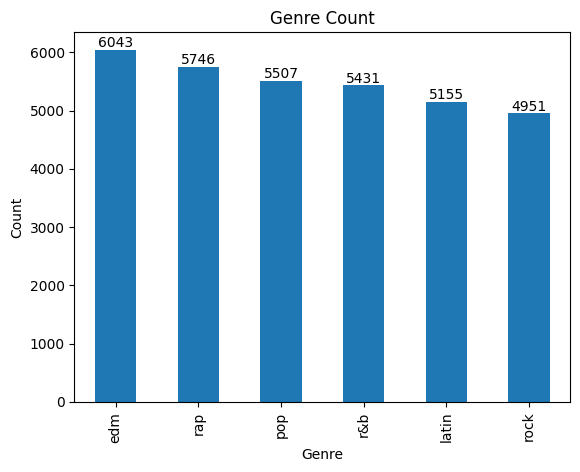

In [127]:
genre_counts = df["playlist_genre"].value_counts()

# Plot a bar graph with value annotations
ax = genre_counts.plot(kind='bar')

# Add value annotations on each bar
for i, v in enumerate(genre_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Count')

Text(0.5, 1.0, 'Artist Count')

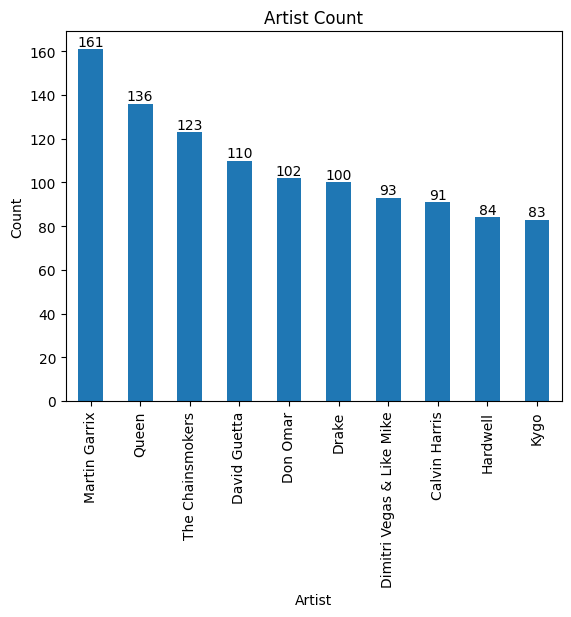

In [128]:
artist_count = df["track_artist"].value_counts().head(10)

# Plot a bar graph with value annotations
ax = artist_count.plot(kind='bar')

# Add value annotations on each bar
for i, v in enumerate(artist_count):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Artist')
plt.ylabel('Count')
plt.title('Artist Count')

<ipython-input-129-e9ba90f87e02>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, fmt= '.2f')


<Axes: >

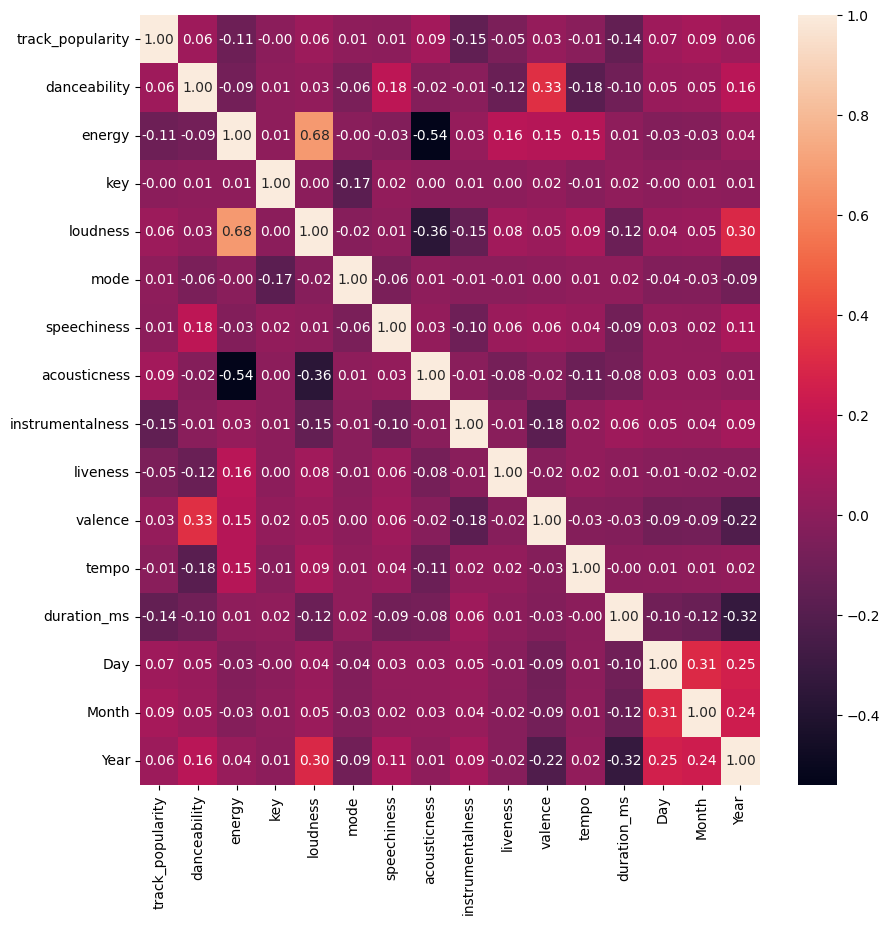

In [129]:
hm = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot = True, fmt= '.2f')

<Axes: xlabel='energy'>

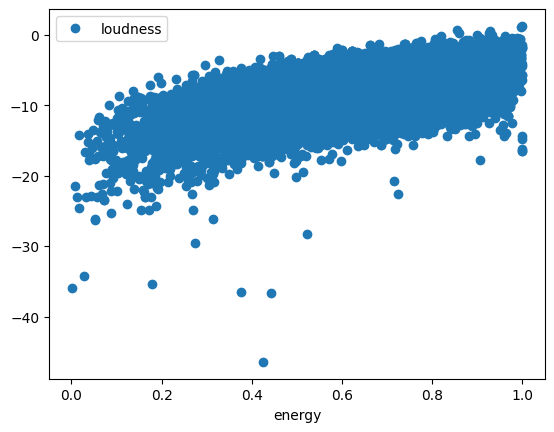

In [130]:
df.plot(x="energy", y='loudness', style='o')

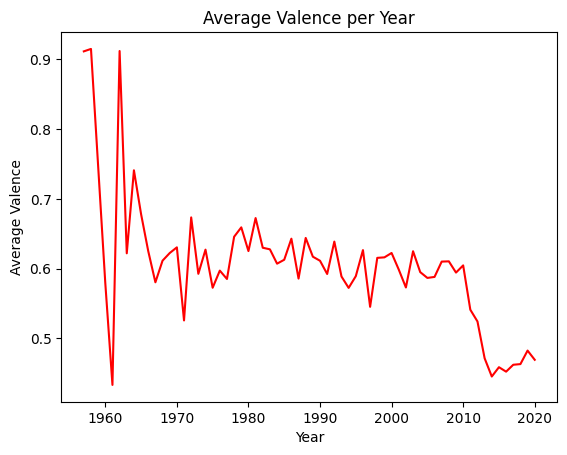

In [131]:
average_per_year = df.groupby('Year')['valence'].mean()

# Plot the average values per year
average_per_year.plot(kind='line', color="red")

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average Valence')
plt.title('Average Valence per Year')

# Display the plot
plt.show()

In [132]:
df["track_popularity"]

0        66
1        67
2        70
3        60
4        69
         ..
32828    42
32829    20
32830    14
32831    15
32832    27
Name: track_popularity, Length: 32833, dtype: int64

In [133]:
categorical_columns = ["track_id", "track_name", "track_artist", "track_album_id", "track_album_name", "track_album_release_date", "playlist_name", "playlist_id", "playlist_genre", "playlist_subgenre"]

label_encoder = LabelEncoder()
for col in categorical_columns:
  df[col] = label_encoder.fit_transform(df[col])


from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in categorical_columns:
  df[col] = label_encoder.fit_transform(df[col])

In [134]:
X = df.drop(["track_popularity", "track_album_release_date"], axis=1)
y = df["track_popularity"]

In [143]:
X_std = StandardScaler().fit_transform(X)

In [136]:
clf = DecisionTreeClassifier()
clf.fit(X_std, y)

DecisionTreeClassifier()

In [138]:
features = {}
for feature, importance in zip(X.columns, clf.feature_importances_):
  features[feature] = importance
  print(f"{feature}: {importance}")

track_id: 0.053840357327551984
track_name: 0.04797832919421905
track_artist: 0.04738100251003945
track_album_id: 0.05428284482206744
track_album_name: 0.04556822659722049
playlist_name: 0.033618401477372946
playlist_id: 0.03436446881383028
playlist_genre: 0.013023636354114675
playlist_subgenre: 0.019346504535942007
danceability: 0.04966472900883149
energy: 0.04919924402149571
key: 0.03764996609135149
loudness: 0.04993219325894767
mode: 0.01563842571688994
speechiness: 0.05189442731562695
acousticness: 0.04968460760809692
instrumentalness: 0.03523882582652613
liveness: 0.050987401157116335
valence: 0.0493701544321251
tempo: 0.05410072518281273
duration_ms: 0.05176335833832685
Day: 0.04247610514732676
Month: 0.03434792762949726
Year: 0.028648137632670413


In [151]:
xgb_model = XGBRegressor()
xgb_model.fit(X_std, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [152]:
features2 = {}

# Get feature importances
feature_importances = xgb_model.feature_importances_

# Display feature importances
for feature, importance in zip(X.columns, feature_importances):
    features2[feature] = importance
    print(f'{feature}: {importance}')

track_id: 0.012342984788119793
track_name: 0.01605253480374813
track_artist: 0.023682188242673874
track_album_id: 0.021020950749516487
track_album_name: 0.022741975262761116
playlist_name: 0.08695315569639206
playlist_id: 0.05706937983632088
playlist_genre: 0.17247062921524048
playlist_subgenre: 0.08335626870393753
danceability: 0.026489296928048134
energy: 0.029666883870959282
key: 0.015766672790050507
loudness: 0.03431308642029762
mode: 0.013376349583268166
speechiness: 0.02171732857823372
acousticness: 0.021831784397363663
instrumentalness: 0.07555411010980606
liveness: 0.018939221277832985
valence: 0.019633306190371513
tempo: 0.023632947355508804
duration_ms: 0.024888930842280388
Day: 0.024622397497296333
Month: 0.02939828857779503
Year: 0.12447928637266159


In [153]:
top_features_dict = dict(zip(X.columns, clf.feature_importances_))

# Sort the dictionary by importance in descending order and get the top 5 features
top_features_dict = dict(sorted(top_features_dict.items(), key=lambda x: x[1], reverse=True)[:5])

top_features_dict2 = dict(zip(X.columns, feature_importances))

# Sort the dictionary by importance in descending order and get the top 5 features
top_features_dict2 = dict(sorted(top_features_dict2.items(), key=lambda x: x[1], reverse=True)[:5])

In [173]:
for a in top_features_dict:
  print(f"{a}: {top_features_dict[a]}")

print()
for b in  top_features_dict2:
  print(f"{b}: {top_features_dict2[b]}")

track_album_id: 0.05428284482206744
tempo: 0.05410072518281273
track_id: 0.053840357327551984
speechiness: 0.05189442731562695
duration_ms: 0.05176335833832685

playlist_genre: 0.17247062921524048
Year: 0.12447928637266159
playlist_name: 0.08695315569639206
playlist_subgenre: 0.08335626870393753
instrumentalness: 0.07555411010980606
